<a href="https://colab.research.google.com/github/ayshahaneena/Covid-19-Unemployment-Analysis/blob/main/Unemployment_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Unemployment Analysis in India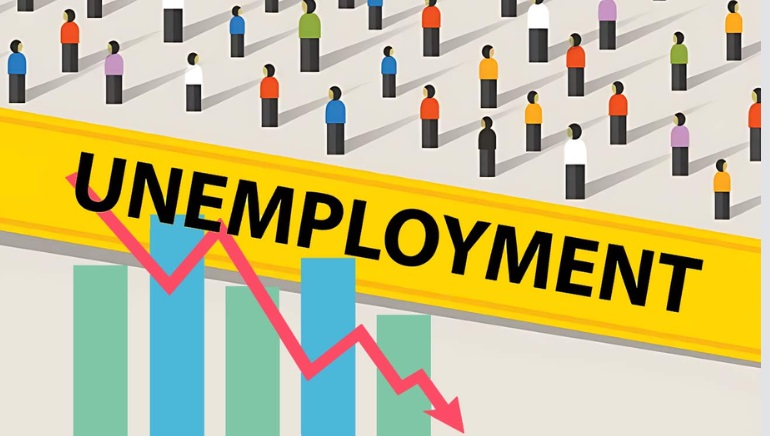

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Data Collection , Exploration  , Wrangling

In [ ]:
df = pd.read_csv('/content/Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.shape

(768, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


### Descriptive Statistics

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### handling missing value

In [ ]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
# check duplicates
df.duplicated().sum()

0

## EDA

In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

There are many whiteSpaces before and after the column name

In [ ]:
# to remove whiteSpaces
df.columns = df.columns.str.strip()

In [ ]:
df.columns


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
# Changing datatype of 'Data' from object to datatime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extracting 3 new features from 'Date'
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [ ]:
df.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019


In [ ]:
df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

Date
2019-05-31     8.874259
2019-06-30     9.303333
2019-07-31     9.033889
2019-08-31     9.637925
2019-09-30     9.051731
2019-10-31     9.900909
2019-11-30     9.868364
2019-12-31     9.497358
2020-01-31     9.950755
2020-02-29     9.964717
2020-03-31    10.700577
2020-04-30    23.641569
2020-05-31    24.875294
2020-06-30    11.903600
Name: Estimated Unemployment Rate (%), dtype: float64

In [ ]:
mean_unemployment_overTime = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

### Plot of Unemployment Over Time

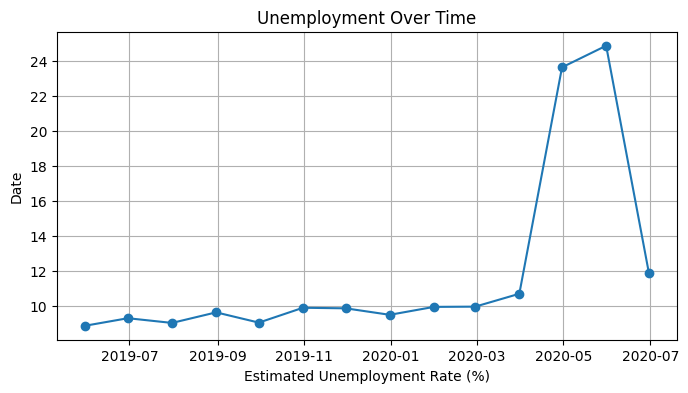

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(mean_unemployment_overTime.index , mean_unemployment_overTime.values , marker='o' )
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Date')
plt.title('Unemployment Over Time')
plt.grid(True)
plt.show()

### Bar Plot of Unemployment Rate By State

In [ ]:
fig = px.bar(df , x= 'Region' , y= 'Estimated Unemployment Rate (%)', color='Region' , title= 'Unemployment Rate By state')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

### Bar Plot of Estimated Employed by Month

In [ ]:
fig = px.bar(df , x='Month' , y='Estimated Employed' , color='Month' , title='Estimated Employed by Month')
fig.show()

### Sunburst Plot

In [ ]:
fig = px.sunburst(df , path=['Area','Region'] , values='Estimated Unemployment Rate (%)', title='Estimated Unemployment Rate by Region and Area')
fig.show()

### Correlation Analysis

In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Day', 'Month', 'Year'],
      dtype='object')

Text(0.5, 1.0, 'Heatmap Correlation')

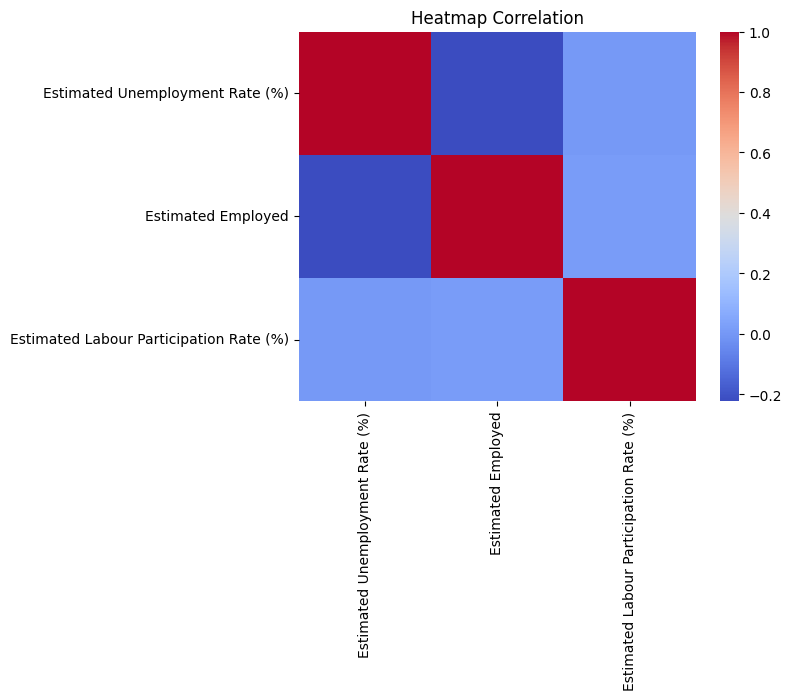

In [ ]:
df_corr = df.drop(columns=['Year' , 'Month' , 'Date' , 'Frequency','Day' , 'Region' , 'Area'])
correlation = df_corr.corr()
sns.heatmap(correlation , cmap='coolwarm' , fmt='.2f')
plt.title('Heatmap Correlation')

### Count Plot by Area

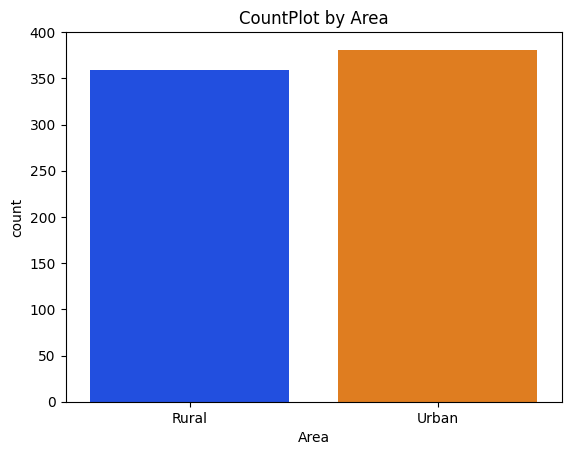

In [ ]:
sns.countplot(data= df , x='Area' , palette='bright')
plt.title('CountPlot by Area')
plt.show()